In [43]:
import networkx as nx
import numpy as np
from cspy import BiDirectional

In [77]:
N = 5 # last is the source
coords = np.asarray([[0,0], [1,0], [0,1], [1,1], [0,0]])
G = nx.DiGraph(directed=True, n_res=2) #res = [?, demand]
for i in range(N):
    name_i = "Source" if i == 0 else i
    for j in range(N):
        name_j = "Sink" if j == N-1 else j
        demand_j = 0 if j == N-1 else j
        if (i != j):
            if (i == 0) and (j == N-1):
                continue
            if (i == N-1) or (j == 0):
                continue
            
            dist = np.round(np.sqrt(np.sum((coords[i] - coords[j])**2)),1)
            G.add_edge(name_i, name_j, weight = dist, res_cost = np.asarray([0, demand_j]))

print(f"Edges")
for edge in G.edges(data=True):
    print(edge)

Edges
('Source', 1, {'weight': 1.0, 'res_cost': array([0, 1])})
('Source', 2, {'weight': 1.0, 'res_cost': array([0, 2])})
('Source', 3, {'weight': 1.4, 'res_cost': array([0, 3])})
(1, 2, {'weight': 1.4, 'res_cost': array([0, 2])})
(1, 3, {'weight': 1.0, 'res_cost': array([0, 3])})
(1, 'Sink', {'weight': 1.0, 'res_cost': array([0, 0])})
(2, 1, {'weight': 1.4, 'res_cost': array([0, 1])})
(2, 3, {'weight': 1.0, 'res_cost': array([0, 3])})
(2, 'Sink', {'weight': 1.0, 'res_cost': array([0, 0])})
(3, 1, {'weight': 1.0, 'res_cost': array([0, 1])})
(3, 2, {'weight': 1.0, 'res_cost': array([0, 2])})
(3, 'Sink', {'weight': 1.4, 'res_cost': array([0, 0])})


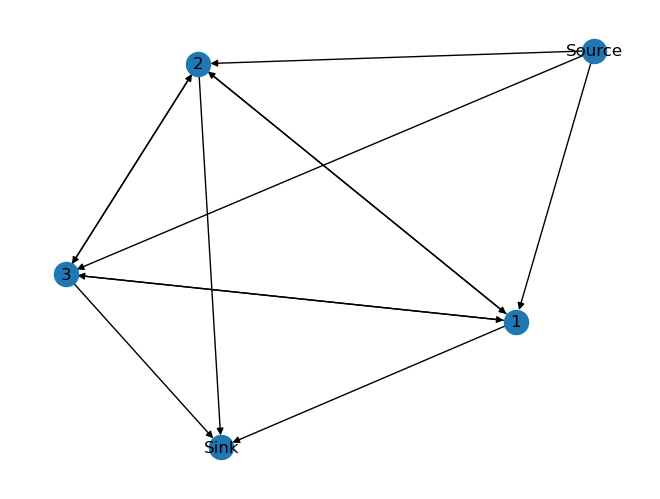

In [78]:
nx.draw_kamada_kawai(G, with_labels = True)

In [79]:
algo = BiDirectional(G=G, max_res=[3, 3], min_res=[0, 0], elementary=True)

In [80]:
algo.run()

In [82]:
print(algo.path)
print(algo.total_cost)
print(algo.consumed_resources)

['Source', 1, 'Sink']
2.0
[0 1]


In [4]:
A = (1,2,3,4,5,6)
A[1:-1]

(2, 3, 4, 5)